In [142]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# 입력 자동화
inputs = [
    {
        "n_m": [10, 10],
        "gh": [
            [1,0,1,1,1,0,1,1,1,1],
            [1,1,1,0,0,1,1,1,0,1],
            [0,0,1,0,1,1,0,0,1,1],
            [1,1,1,0,1,0,0,1,1,0],
            [1,1,0,0,1,0,1,1,0,0],
            [0,1,1,1,1,1,0,1,1,0],
            [0,1,0,0,0,1,0,0,1,1],
            [0,1,1,1,0,1,0,1,1,1],
            [0,1,0,1,1,1,0,1,0,0],
            [0,1,1,1,0,0,0,1,1,1]
        ]
    }
]

# 상하좌우 이동 표시
dx = [1, -1, 0, 0]
dy = [0, 0, 1, -1]

In [143]:
# DFS 동작 함수

def dfs(x, y, n, m, gh, vt, path):
    path.append((x, y))  # 기록 저장
    if x == n-1 and y == m-1:  # 도착점 도달, 함수 종료 및 데이터 저장
        return path
    for i in range(4):  # 현 위치 상하좌우 이동
        nx, ny = x + dx[i], y + dy[i]
        if 0 <= nx < n and 0 <= ny < m and gh[nx][ny] == 1 and vt[nx][ny] == 0:
            vt[nx][ny] = vt[x][y] + 1
            result = dfs(nx, ny, n, m, gh, vt, path)
            if result is not None:
                return result
    path.pop()
    return None #경로를 찾지 못한 경우 반환

In [144]:
# BFS 동작 함수(최종 과정 기록)

def bfs(x, y, n, m, gh, vt):
    q = deque([(x, y)])  # 탐색을 시작할 노드를 큐에 추가
    vt[x][y] = 1  # 시작 노드를 방문표시
    parent = {(x, y): (-1, -1)} # 부모 노드 맵 초기화

    while q:  # 큐가 빌 때까지 탐색
        x, y = q.popleft()  # 큐에서 노드를 하나 꺼냄
        for i in range(4):  # 해당 노드에서 상하좌우로 이동
            nx, ny = x + dx[i], y + dy[i]
            if 0 <= nx < n and 0 <= ny < m and gh[nx][ny] == 1 and vt[nx][ny] == 0:
                q.append((nx, ny))
                vt[nx][ny] = vt[x][y] + 1
                parent[(nx, ny)] = (x, y)  # 부모 노드 저장
                if nx == n-1 and ny == m-1:  # 도착점 도달
                    path = []
                    while (nx, ny) != (-1, -1):
                        path.append((nx, ny))
                        nx, ny = parent.get((nx, ny), (-1, -1))
                        if (nx, ny) in parent:
                            nx, ny = parent[(nx, ny)]
                        else:
                            break
                    return path[::-1]  # 경로를 역순으로 반환
    return None  # 경로를 찾지 못한 경우


In [145]:
# BFS 동작 함수(모든 과정 기록)

def bfs_all(x, y, n, m, gh, vt):
    q = deque([(x, y)])  # 탐색을 시작할 노드를 큐에 추가
    vt[x][y] = 1  # 시작 노드를 방문표시
    path = [(x, y)]  # 기록 저장
    while q:  # 큐가 빌 때까지 탐색
        x, y = q.popleft()  # 큐에서 노드를 하나 꺼냄
        for i in range(4):  # 해당 노드에서 상하좌우로 이동
            nx, ny = x + dx[i], y + dy[i]
            if 0 <= nx < n and 0 <= ny < m and gh[nx][ny] == 1 and vt[nx][ny] == 0:
                q.append((nx, ny))
                vt[nx][ny] = vt[x][y] + 1
                path.append((nx, ny))
                if nx == n-1 and ny == m-1:  # 도착점 도달
                    return path
    return path

In [148]:
def plot_path(maze, path, title, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.set_title(title)
    ax.imshow(maze, cmap='Greys', interpolation='none')
    xs, ys = zip(*path)  # 경로의 x, y 좌표를 분리
    ax.plot(ys, xs, 'bo-')  # 경로를 파란색 선으로 표시

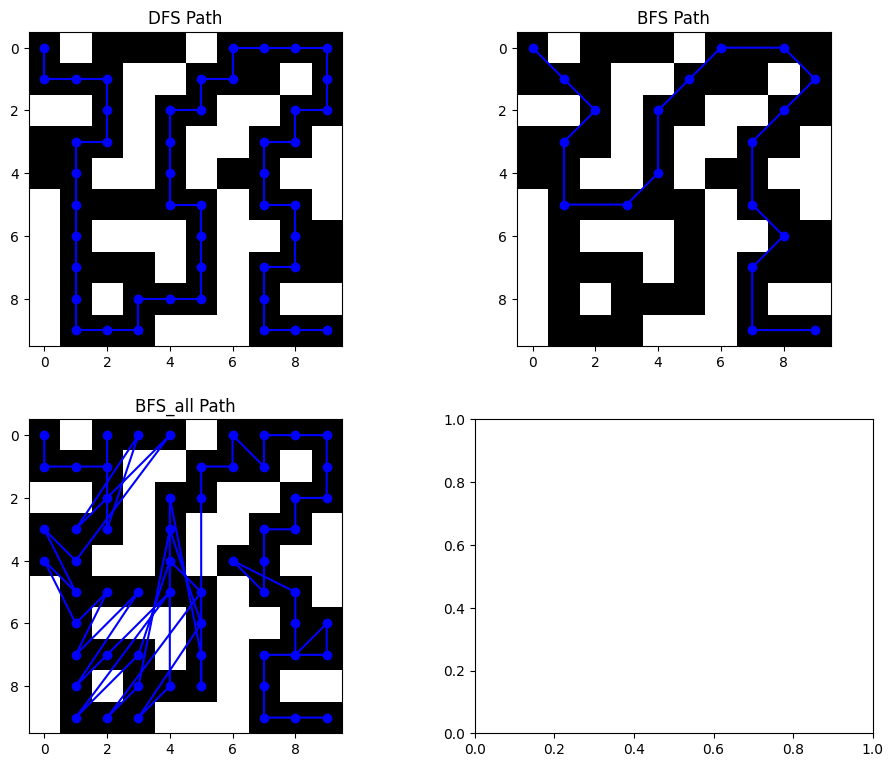

In [149]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,8)

# DFS 경로 탐색 및 시각화
vt = [[0] * m for _ in range(n)]  # 방문 배열 초기화
path_dfs = dfs(0, 0, n, m, gh, vt, [])
if path_dfs is not None:
    plot_path(maze, path_dfs, "DFS Path", ax=axes[0,0])
else:
    print("DFS로 경로를 찾지 못했습니다.")

# BFS 경로 탐색 및 시각화
vt = [[0] * m for _ in range(n)]
path_bfs = bfs(0, 0, n, m, gh, vt)
if path_bfs is not None:
    plot_path(maze, path_bfs, "BFS Path", ax=axes[0,1])
else:
    print("BFS로 경로를 찾지 못했습니다.")

# BFS_all 경로 탐색 및 시각화
vt = [[0] * m for _ in range(n)]
path_bfs_all = bfs_all(0, 0, n, m, gh, vt)
if path_bfs_all is not None:
    plot_path(maze, path_bfs_all, "BFS_all Path", ax=axes[1,0])